##**<//===========Customer loan prediction analysis============//>**##

# CUSTOMER LOAN PREDICTION USING MACHINE LEARNING ALGORITHM

Here we are try to find out Machine learning model to predict whether assigning the loan to particular person will be safe or not.We are using the previous records of the people to whom the loan was granted before and on the basis of these records/experiences the machine was trained using the machine learning model (Logistic Regression model) which give the most accurate result.

##**Prediction Object**



*   The main objective of this project is to predict whether assigning the loan to particular person will be safe or not.



###**Loading Required libraries**

In [4]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# load the data from csv file to Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Datasets/loan_data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


##**Printing the first 5 rows of the dataframe**


In [9]:
print('Test data shape: ', data.shape)
data.head()

Test data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# getting some informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# check the number of missing values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##***Handling the Missing values***

In [12]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data['Dependents'].fillna(data["Dependents"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

In [13]:
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean(),inplace=True)

In [14]:
data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace=True)

In [15]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h1><b>Data Analysis<b></h1>

##***Now, let's analyze categotical Columns:***

In [16]:
df = data.drop(columns=['Loan_ID'])
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

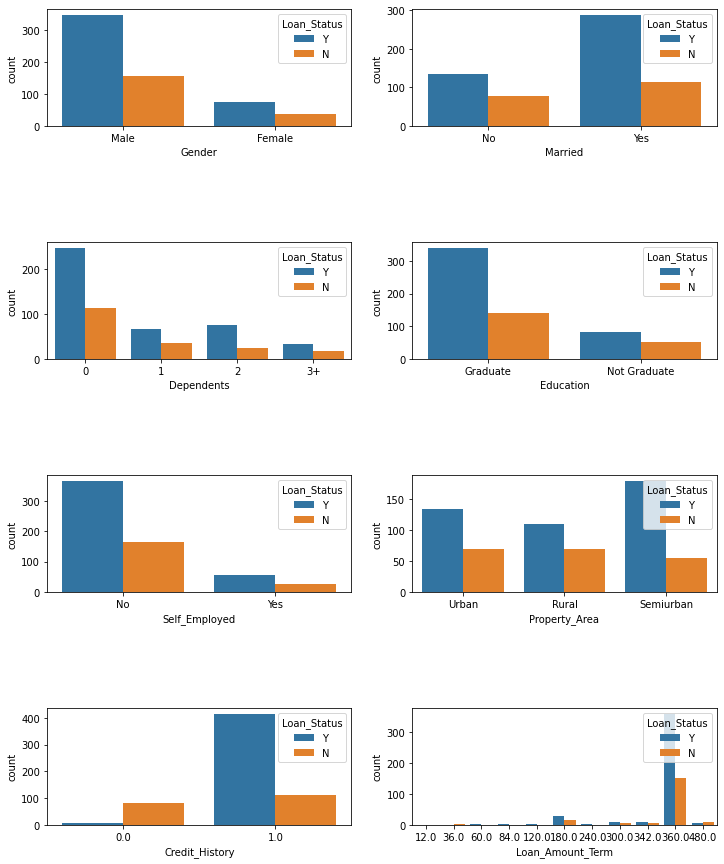

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# Matplotlib is better for basic plots while seaborn is better for more advanced statistical plots
fig,axes = plt.subplots(4,2 ,figsize=(12, 15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2, idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

###**Plots above convey following things about the dataset**:


1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men than Women (approx. 3x)
3. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6. Employment: 5/6th of population is not self employed.
7. Property Area: More applicants from Semi-urban and also likely to be granted loans.
8. Applicant with credit history are far more likely to be accepted.
9. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).



##***Now, let's also analyze Numerical Columns:***

In [18]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


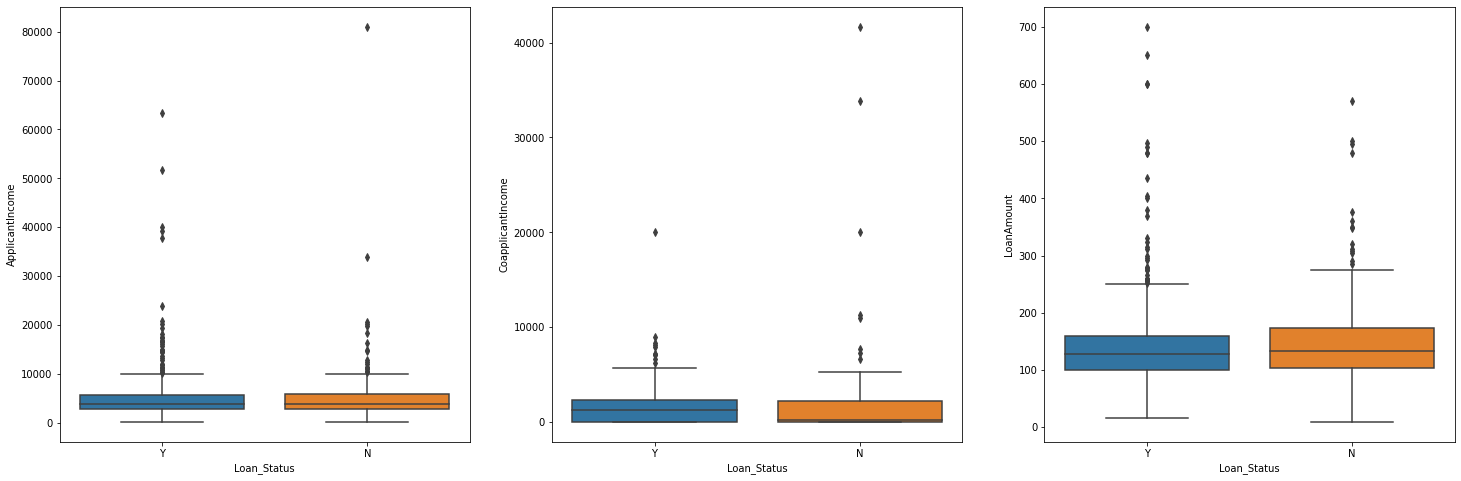

In [19]:
fig,axes = plt.subplots(1,3,figsize=(25,8))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

For Numercical Columns, there is no significant relation to Loan approval status.

<h2><b>Encoding the Categorical Columns</b></h2>

In [20]:
#### Encoding categrical Features: ##########
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categ = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_Status']
df[categ] = df[categ].apply(le.fit_transform)

In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


<h1><b>Normalizing features using Min-Max in Scikit Learn</b></h1>


In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

min_max=MinMaxScaler()

# normalize all int features
col=df.columns[df.dtypes =='int64']
for i in col:
    x = df[i]
    y = np.array(x).reshape(-1,1)
    df[i] = min_max.fit_transform(y)

# normalize all float features    
col=df.columns[df.dtypes =='float64']
for i in col:
    x = df[i]
    y = np.array(x).reshape(-1,1)
    df[i] = min_max.fit_transform(y)

In [23]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0,1.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0,1.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0,1.0


In [24]:
X =df.drop(columns='Loan_Status')
y = df['Loan_Status']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0)

In [26]:
from sklearn.tree import DecisionTreeClassifier
cl = DecisionTreeClassifier(random_state=0)
cl.fit(X_train,y_train)
predictions = cl.predict(X_test)
print(predictions)

[0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.]


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions)*100,"%")

70.12987012987013 %


In [28]:
from sklearn import linear_model, metrics
  
 
# create logistic regression object
reg = linear_model.LogisticRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = reg.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 83.11688311688312


In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array([1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0.])

In [31]:
print(accuracy_score(y_test, y_pred)*100,"%")

81.16883116883116 %


In [32]:
# Fitting Naive Bayes to the Training set
#when the features have continuous values  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train) 
pred = classifier.predict(X_test)
print("accuracy_score - ",accuracy_score(y_test, pred)*100)

accuracy_score -  82.46753246753246


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
print("accuracy_score - ",accuracy_score(y_test, predictions)*100)

accuracy_score -  80.51948051948052


What is the use of XGBoost?

# XGBoost, which stands for Extreme Gradient Boosting,
It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems

 Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [34]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,pred)*100)

accuracy_score 81.16883116883116


##**Conclusion**
####*A system called loan credibility prediction system that helps the organization in making right decision to approve or reject the loan request of the customers.*####

#*>//=============**Thank you**==============//<*

Here we are try to find out Machine learning model to predict whether assigning the loan to particular person will be safe or not.We are using the previous records of the people to whom the loan was granted before and on the basis of these records/experiences.